In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings("ignore")

## Problem statement

Propensity model to predict whether a client will trade in first 2 weeks

## Features

* Age
* City
* State
* IncomePA
* fund added in first 2 days
* KRA
* BSDA
* isKarvy
* E2channel
* mobileapp_yn
* segments_activated
* Number of logins in first 2 days after account open
* num of days from download to account open
* client source


In [34]:
##  Data importing
# df_client = pd.read_csv("../../data/dw_mst_client.csv")
df_clever = pd.read_csv("../../data/clevertap_client_trade_data.csv")


## feature hunt

In [4]:
cols = ["cm_cd","cm_dob", "data_source", "E2Channel", "E2Business", "IncomePA", "BSDA", 
                     "Is_Metro", "IsKarvy", "EmpAccount YN"]
df = df_client[cols]

In [5]:
df["data_source"].value_counts()

Equity       2383258
Currency      394280
Commodity     369142
Name: data_source, dtype: int64

In [6]:
cols.remove("data_source")

In [27]:

# from collections import defaultdict 
# Equity_dict = defaultdict(int)
# Commodity_dict = defaultdict(int)
# Currency_dict = defaultdict(int)


# for i in range(len(df)):
#     if df["data_source"].iloc[i] != "":
#         exec("{}_dict[df['cm_cd'].iloc[i]] = 1".for=mat(df["data_source"].iloc[i]))

df = df.drop_duplicates(['cm_cd'], keep='last')

df[["equity", "comm", "curr"]] = np.zeros([len(df), 3])

In [32]:
for i in range(len(df)):
    if i % 100000 == 0:
        print("shit happened")
    client = df["cm_cd"].iloc[i]
    df["equity"].iloc[i] = Equity_dict[client]
    df["comm"].iloc[i] = Commodity_dict[client] 
    df["curr"].iloc[i] = Currency_dict[client]    

shit happened
shit happened
shit happened
shit happened
shit happened
shit happened
shit happened
shit happened
shit happened
shit happened
shit happened
shit happened
shit happened
shit happened
shit happened
shit happened
shit happened
shit happened
shit happened
shit happened
shit happened
shit happened
shit happened
shit happened


In [55]:
df_chumma = df.copy()

In [46]:
df_test["cm_dob"].iloc[0]

'19750503'

In [65]:
now = pd.Timestamp('now')

df['cm_dob'] = df['cm_dob'].astype(str).str.split(".").str[0]
df['cm_dob'] = pd.to_datetime(df['cm_dob'], format='%Y%m%d', errors='coerce')
df['cm_dob'] = df['cm_dob'].where(df['cm_dob'] < now, df['cm_dob'] -  np.timedelta64(100, 'Y'))   # 2
df['age'] = (now - df['cm_dob']).astype('<m8[Y]')    # 3



#### adding logins in first 2 days

In [69]:
df_logins = pd.read_csv("../../data/num_logins_in_2_days_after_acc_open.csv")

In [72]:
df = pd.merge(df, df_logins, 
              left_on = "cm_cd", right_on = "ClientCode", how = "inner")[list(df.columns) + ["logins_in_first_2_days"]]

In [68]:
df.to_csv("./inter_data/gathered_data_1.csv")

<AxesSubplot:ylabel='Count'>

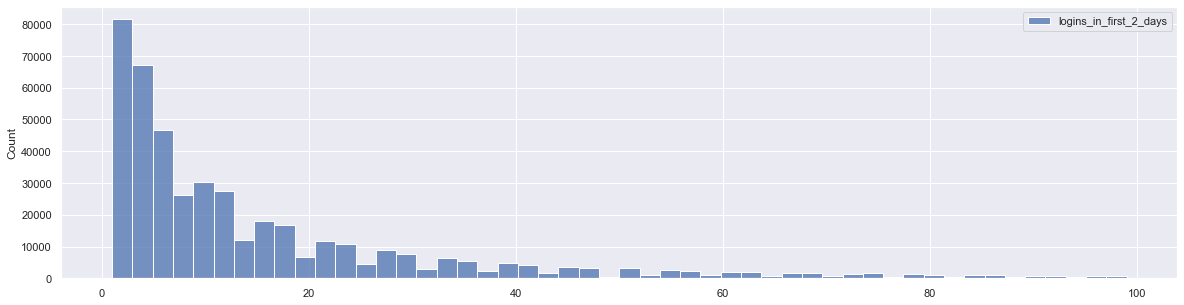

In [84]:
sns.set(rc={'figure.figsize':(20,5)})

sns.histplot(df[df["logins_in_first_2_days"] < 100][["logins_in_first_2_days"]], bins = 50)

In [80]:
df.to_csv("./inter_data/gathered_data_2.csv")